In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
dentists = pd.read_csv("C:\\Users\\user\\Desktop\\dataset\\dentists.csv")

In [6]:
dentists.head()

,Location,Period,Indicator,First Tooltip
0,Afghanistan,2016,"Dentists (per 10,000)",0.034
1,Afghanistan,2015,"Dentists (per 10,000)",0.036
2,Afghanistan,2014,"Dentists (per 10,000)",0.033
3,Afghanistan,2008,"Dentists (per 10,000)",0.140
4,Afghanistan,2007,"Dentists (per 10,000)",0.120


In [8]:
allCountries =dentists['Location'].unique().tolist()

In [16]:
def compareCountries(countries):
    fig = plt.figure(figsize = (10,10))
    ax1 = plt.subplot2grid((1,1),(0,0))

    for country in countries:
        if country not in allCountries:
            print(f"Country {country} DO NOT EXIST ")
            return
        tempData = dentists[dentists['Location'] == country]
        tempData['Period'] = pd.to_datetime(tempData['Period'], format = '%Y')
        ax1.plot(tempData['Period'], tempData['First Tooltip'], label=country)
        
    for tick in ax1.get_xticklabels():
        tick.set_rotation(45)
    plt.grid()
    plt.legend()
    plt.xlabel("Year")
    plt.ylabel("Dentists")
    plt.title("Number of Dentists Per 10000")
    plt.show()

In [17]:
def autoLabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height, '%d'%int(height), ha='center', va = 'bottom')

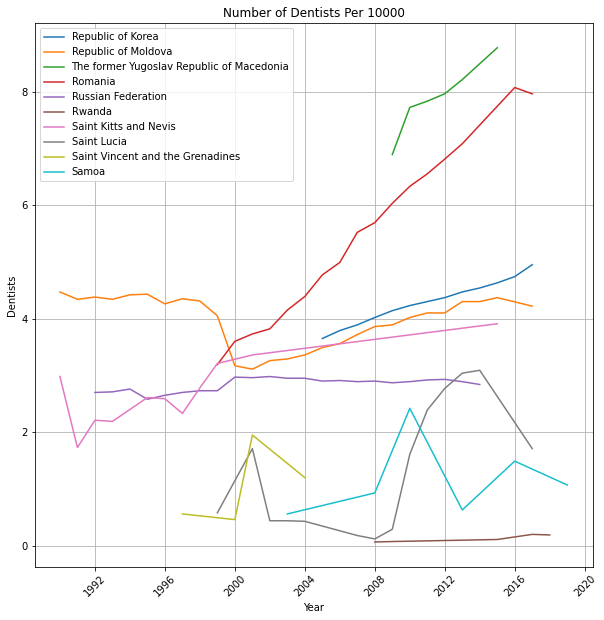

In [34]:
import random
i=random.randint(0,len(allCountries)-10)
countries=allCountries[i:i+10]
compareCountries(countries)
    

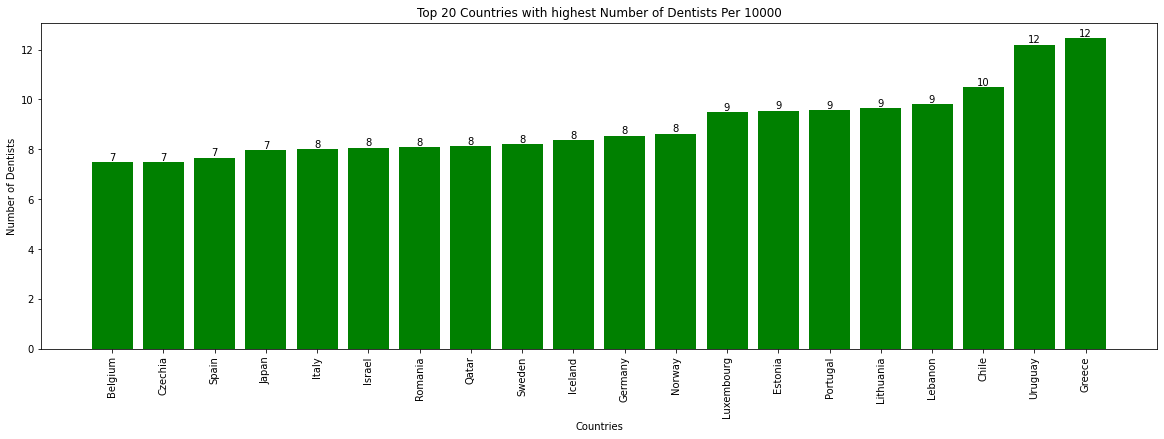

In [33]:
tempData = dentists[dentists['Period'] == 2016]
tempData.sort_values('First Tooltip', inplace=True)
tempDataBot = tempData[-20:]
fig = plt.figure(figsize=(20,6))
ax = plt.subplot2grid((1,1),(0,0))
rects = ax.bar(tempDataBot['Location'], tempDataBot['First Tooltip'], color = "green")
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
autoLabel(rects)
plt.xlabel("Countries")
plt.ylabel("Number of Dentists")
plt.title("Top 20 Countries with highest Number of Dentists Per 10000")
plt.show()

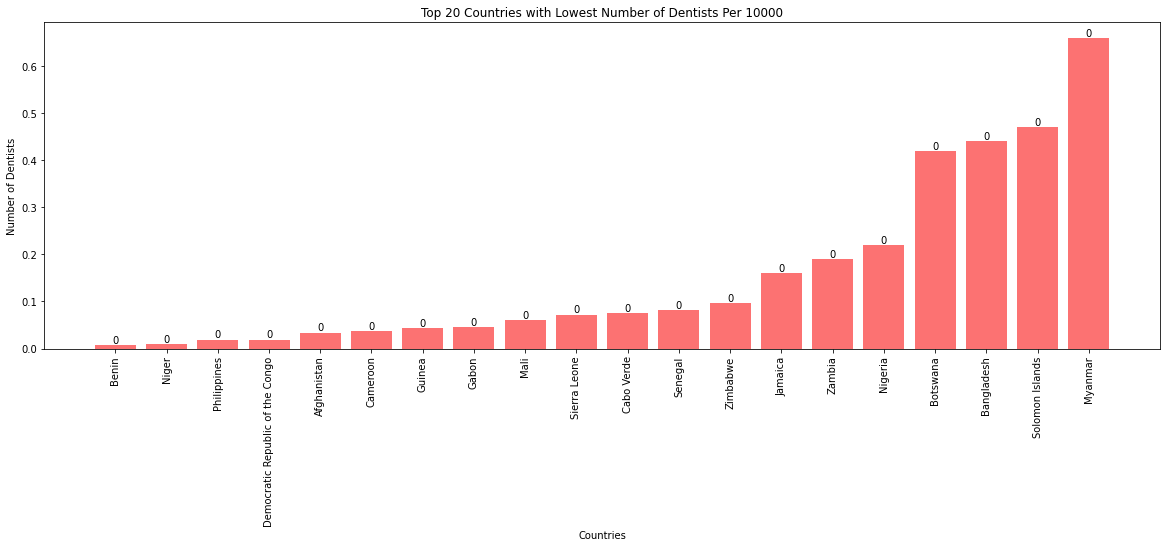

In [21]:
tempData = dentists[dentists['Period'] == 2016]
tempData.sort_values('First Tooltip', inplace=True)
tempDataBot = tempData[:20]
fig = plt.figure(figsize=(20,6))
ax = plt.subplot2grid((1,1),(0,0))
rects = ax.bar(tempDataBot['Location'], tempDataBot['First Tooltip'], color = "#fc7272")
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
autoLabel(rects)
plt.xlabel("Countries")
plt.ylabel("Number of Dentists")
plt.title("Top 20 Countries with Lowest Number of Dentists Per 10000")
plt.show()

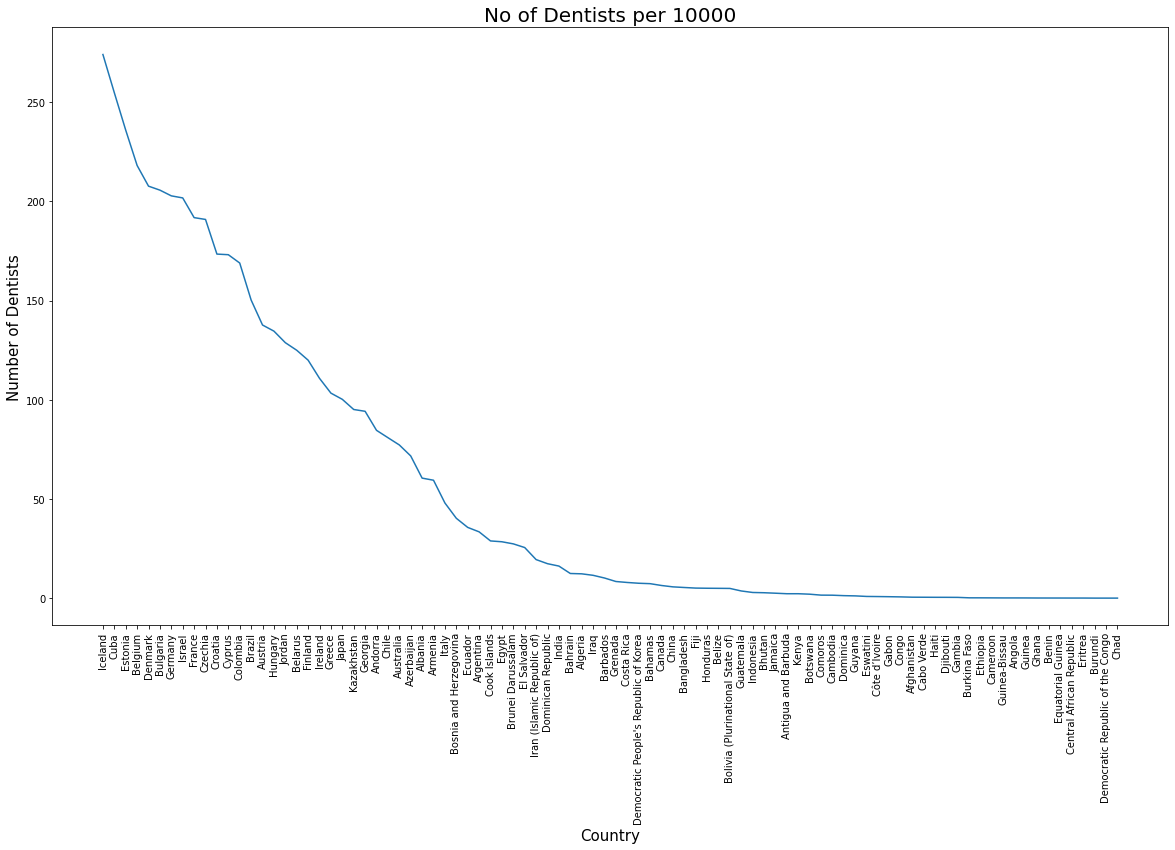

In [28]:
df = dentists[dentists['Location']=='Afghanistan']
dentists_sort = pd.DataFrame([])
dentists_sort0 = []
dentists_sort1 = []
index = []

for i in np.unique(dentists['Location'][:1000]):
    dentists_sort0.append(i)
    dentists_sort1.append(dentists['First Tooltip'][dentists['Location']==i].sum())
    index.append(list(dentists['Location'][dentists['Location']==i].index)[0])
    
dentists_sort['Name'] = dentists_sort0
dentists_sort['Value'] = dentists_sort1
dentists_sort.index = index
dentists_sort = dentists_sort.sort_values(by='Value', ascending=False)

fig, ax = plt.subplots(1, 1, figsize=(20, 11))
plt.plot(dentists_sort['Name'], dentists_sort['Value'])
plt.title('No of Dentists per 10000', size=20)
plt.xlabel('Country', size=15)
plt.ylabel('Number of Dentists', size=15)
plt.xticks(rotation=90, size=10)
plt.show()

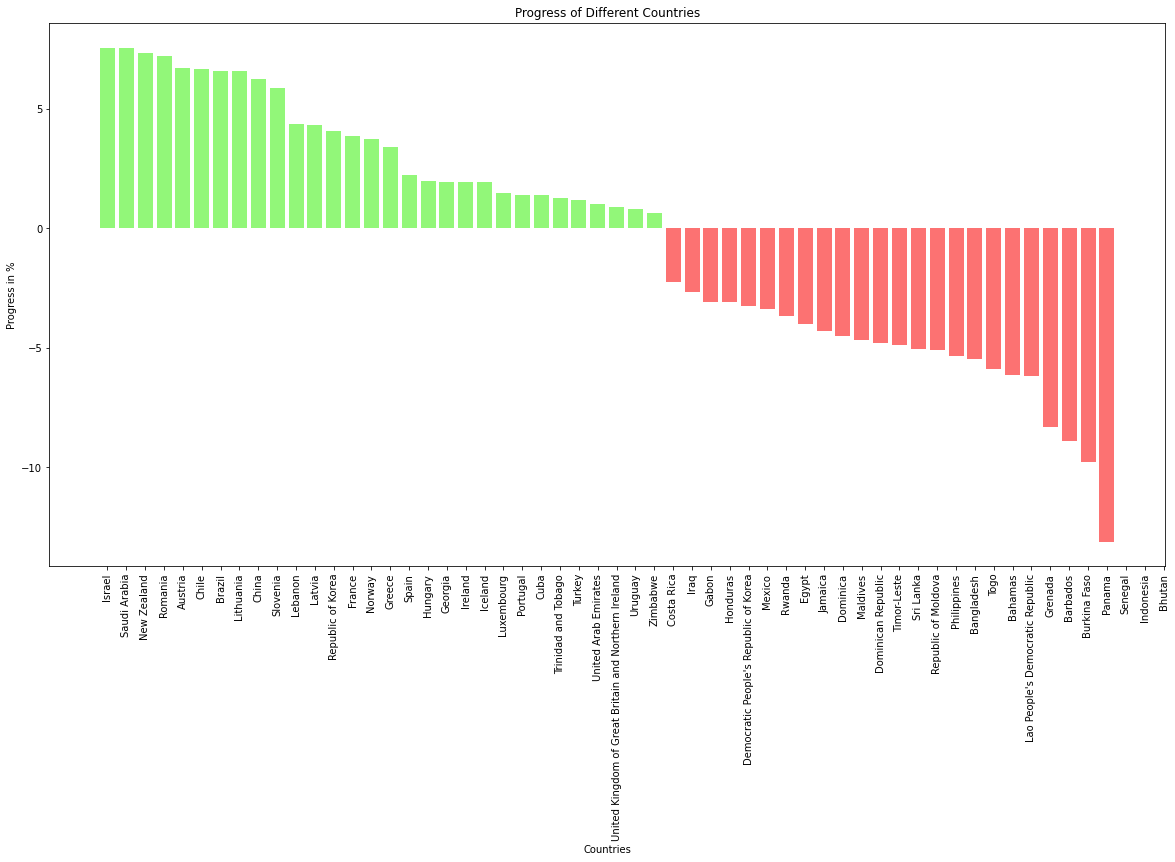

In [31]:

tempData2016 = dentists[dentists['Period'] == 2017]
tempData2000 = dentists[dentists['Period'] == 2000]
tempData2016.reset_index(inplace=True)
tempData2000.reset_index(inplace=True)
tempData = tempData2016.join(tempData2000, lsuffix='_16', rsuffix='_00')
tempData['progress'] = tempData['First Tooltip_00'] - tempData['First Tooltip_16']
tempData = tempData[['Location_16', 'progress']].sort_values('progress', ascending=False)
tempDataTop = tempData[-30:]
tempDataBot = tempData[:30]

fig = plt.figure(figsize=(20,10))

ax1 = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan=1)
rects1 = ax1.bar(tempDataTop['Location_16'], tempDataBot['progress'], color = '#92f779')
rects1 = ax1.bar(tempDataBot['Location_16'], tempDataTop['progress'], color = '#fc7272')
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)

plt.xlabel("Countries")
plt.ylabel("Progress in %")
plt.title("Progress of Different Countries")
plt.show()